In [1]:
import numpy as np
from utils.utils import load_pickle, save_pickle
from utils.utils import get_gaussian_weight
from matplotlib import pyplot as plt
import torch
import pickle
from tqdm import tqdm
emat_result = load_pickle("./results/charades_EMAT_test.pkl")

save_dict = []
for sample in emat_result:
    vid, se_logits, vlen = sample
    se_logits = se_logits[:int(vlen)]
    se_logits = torch.sigmoid(se_logits)


    # save_dict.append([vid, torch.stack([se_logits])])


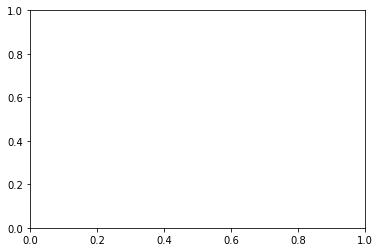

In [7]:
plt.cla()

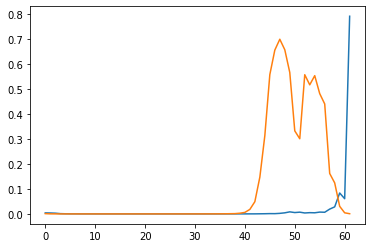

In [8]:
plt.plot(se_logits[1, :])
plt.plot(se_logits[0, :])

In [9]:
se_logits

tensor([[1.1879e-03, 3.3798e-04, 1.7265e-04, 9.7616e-05, 5.9209e-05, 5.1042e-05,
         5.4334e-05, 4.4346e-05, 4.7206e-05, 4.9472e-05, 4.2982e-05, 4.6113e-05,
         4.6474e-05, 4.3659e-05, 5.0645e-05, 5.5622e-05, 4.7950e-05, 5.4760e-05,
         5.6498e-05, 5.7388e-05, 5.6058e-05, 6.4020e-05, 5.4334e-05, 6.5028e-05,
         6.4020e-05, 6.9765e-05, 6.7092e-05, 7.8438e-05, 7.5433e-05, 9.6856e-05,
         1.0071e-04, 1.3135e-04, 1.4768e-04, 2.0027e-04, 2.3414e-04, 3.7850e-04,
         5.0728e-04, 9.0045e-04, 1.1925e-03, 2.8449e-03, 6.0976e-03, 1.8125e-02,
         4.8949e-02, 1.4719e-01, 3.1321e-01, 5.5703e-01, 6.5512e-01, 6.9854e-01,
         6.5655e-01, 5.6548e-01, 3.3220e-01, 3.0064e-01, 5.5670e-01, 5.1632e-01,
         5.5293e-01, 4.8106e-01, 4.3981e-01, 1.6172e-01, 1.2411e-01, 3.0387e-02,
         4.4684e-03, 8.5257e-04],
        [4.1019e-03, 3.7362e-03, 2.9694e-03, 1.1741e-03, 6.6152e-04, 3.9666e-04,
         3.9358e-04, 2.3231e-04, 2.3051e-04, 1.8962e-04, 1.7401e-04, 1.6998

In [ ]:
import json
import numpy as np
import matplotlib.pyplot as plt
gt_path = "./data/anet_gt/train.json"
with open(gt_path, 'r') as fr:
    gt_json = json.load(fr)

max_tlen = 0
tlen_list = []
for sample in gt_json:
    sentence = sample[3]
    token = sentence.split()
    max_tlen = max(len(token), max_tlen)
    tlen_list.append(len(token))
print(max_tlen)

In [ ]:
np.average(tlen_list)

In [ ]:
plt.hist(tlen_list, bins=30)

In [ ]:
import json

raw_path = "./data/charades_reset/train.json"
with open(raw_path, 'r') as fr:
    raw_json1 = json.load(fr)
raw_json1 = sorted(raw_json1, key=lambda x: x[0])

raw_path = "./data/charades_gt/train.json"
with open(raw_path, 'r') as fr:
    raw_json2 = json.load(fr)
raw_json2 = sorted(raw_json2, key=lambda x: x[0])



In [ ]:
raw_json1[0]

In [ ]:
for s1, s2 in zip(raw_json1, raw_json2):
    if s1[0] != s2[0]:
        print(s1, s2)
        break

In [ ]:
import os
import json
import easydict
from easydict import EasyDict
import numpy as np
from tqdm import tqdm
import random

In [ ]:
raw_path = "data/charades_reset/train.json"
with open(raw_path, 'r') as fr:
    raw_json = json.load(fr)
new_json = []
for i in raw_json:
    new_json.append(i[:4])
    assert i[1] >= i[2][1], "{} {}".format( i[1], i[2][1])


new_path = "data/charades_clean/train.json"
with open(new_path, 'w') as fr:
    json.dump(new_json, fr)

In [ ]:
config_path = "config/charades/main_i3d.json"

In [ ]:
config_path = "config/charades/main_i3d.json"
def load_json(filename):
    with open(filename, encoding='utf8') as fr:
        return EasyDict(json.load(fr))


In [ ]:
with open(config_path, encoding='utf8') as fr:
    a  = json.load(fr)

In [ ]:
feature_dir = "/storage/rjliang/W/VSLNet/data/features/charades/new" # 6673
feat_len_path = os.path.join(feature_dir, 'feature_shapes.json')
vfeat_lens = load_json(feat_len_path)
# vfeat_lens = get_vfeat_len(feature_dir)

In [ ]:
feature_dir2 = "/storage_fast/rjliang/charades/c3d_1024"
lens2 = {}
v_list = os.listdir(feature_dir2)

In [ ]:
for vid in v_list:
    tmp = os.path.join(feature_dir2, vid)
    ll = np.load(tmp).shape[0]
    lens2[vid[:-4]] = ll
    break

In [ ]:
print(len(vfeat_lens))
print(len(lens2))



In [ ]:
for vid in vfeat_lens:
    assert vfeat_lens[vid] == lens2[vid]

In [ ]:

def compute_overlap(pred, gt):
    # check format
    assert isinstance(pred, list) and isinstance(gt, list)
    pred_is_list = isinstance(pred[0], list)
    gt_is_list = isinstance(gt[0], list)
    pred = pred if pred_is_list else [pred]
    gt = gt if gt_is_list else [gt]
    # compute overlap
    pred, gt = np.array(pred), np.array(gt)
    inter_left = np.maximum(pred[:, 0, None], gt[None, :, 0])
    inter_right = np.minimum(pred[:, 1, None], gt[None, :, 1])
    inter = np.maximum(0.0, inter_right - inter_left)
    union_left = np.minimum(pred[:, 0, None], gt[None, :, 0])
    union_right = np.maximum(pred[:, 1, None], gt[None, :, 1])
    union = np.maximum(1e-12, union_right - union_left)
    overlap = 1.0 * inter / union
    # reformat output
    overlap = overlap if gt_is_list else overlap[:, 0]
    overlap = overlap if pred_is_list else overlap[0]
    return overlap


def time_to_index(start_time, end_time, num_units, duration):
    s_times = np.arange(0, num_units).astype(np.float32) / float(num_units) * duration
    e_times = np.arange(1, num_units + 1).astype(np.float32) / float(num_units) * duration
    candidates = np.stack([np.repeat(s_times[:, None], repeats=num_units, axis=1),
                           np.repeat(e_times[None, :], repeats=num_units, axis=0)], axis=2).reshape((-1, 2))
    overlaps = compute_overlap(candidates.tolist(), [start_time, end_time]).reshape(num_units, num_units)
    start_index = np.argmax(overlaps) // num_units
    end_index = np.argmax(overlaps) % num_units
    return start_index, end_index, overlaps

In [ ]:
def get_vfeat_len(feature_dir, max_pos_len):
    vfeat_lens = {}
    for vid in tqdm(os.listdir(feature_dir), desc="get video feature lengths"):
        tmp = os.path.join(feature_dir, vid)
        ll = np.load(tmp).shape[0]
        vfeat_lens[vid[:-4]] = min(max_pos_len, ll)
    return vfeat_lens 

In [ ]:
raw_path =  "data/charades_clean/train.json"
with open(raw_path, 'r') as fr:
    raw_json = json.load(fr)
vfeat_lens = get_vfeat_len(feature_dir="/storage_fast/rjliang/charades/c3d_1024", max_pos_len=64)
 

In [ ]:
def time_to_index_my(s, e,  feature_len, duration):
    s = round(s / duration * feature_len)
    e = round(e / duration * feature_len)
    return s, e

for idx, record in enumerate(raw_json):
    vid = record[0]
    duration = record[1]
    s, e = record[2]
    flen = vfeat_lens[vid]
    s_ind1, e_ind1, _ = time_to_index(s, e, flen, duration)
    s_ind2, e_ind2 = time_to_index_my(s, e, flen, duration)
    
    assert e_ind1 <= flen
    assert e_ind2 <= flen
    assert s_ind1 == s_ind2, "{} {}".format(s_ind1, s_ind2)
    assert e_ind1 == e_ind2, "{} {} {}".format(e_ind1, e_ind2, idx)
    


In [ ]:
def time_to_index_my(s, e,  feature_len, duration):
    feature_len = feature_len - 1
    s = round(s / duration * feature_len)
    e = round(e / duration * feature_len)
    return s, e


for i in range(100):

    s = 0.0
    e = 0.0 + i*0.1
    feature_nums = 11
    duration = 10

    s_ind1, e_ind1, _ = time_to_index(s, e, feature_nums, duration)
    s_ind2, e_ind2 = time_to_index_my(s, e, feature_nums, duration)

    print("{:.2f} {:.2f}".format(s, e), end="")
    print("|", s_ind1, e_ind1, "|", s_ind2, e_ind2)


# assert s_ind1 == s_ind2, "{} {}".format(s_ind1, s_ind2)
# assert e_ind1 == e_ind2, "{} {} {}".format(e_ind1, e_ind2, idx)



In [ ]:
import torch
logits = torch.randn(20, 32)
gumbels = (-torch.empty_like(logits, memory_format=torch.legacy_contiguous_format).exponential_().log())

In [ ]:
for m in model.modules():
    if isinstance(m, (nn.Conv2d, nn.Linear)):
        nn.init.orthogonal(m.weight)

In [ ]:
import torch
from torch import nn


# label_embs = tf.get_variable(name='label_emb', shape=[4, self.configs.dim], dtype=tf.float32,
#                                     trainable=True, initializer=tf.orthogonal_initializer())
# ortho_constraint = tf.multiply(tf.matmul(label_embs, label_embs, transpose_b=True),
#                                 1.0 - tf.eye(4, dtype=tf.float32))

label_embs = torch.empty(size=[128, 4], dtype=torch.float32)
label_embs = nn.init.orthogonal(label_embs.data)
ortho_constraint = torch.matmul(label_embs.T, label_embs) * (1.0 - torch.eye(4, dtype=torch.float32))




In [ ]:
print(label_embs[0])
print(label_embs[1])

In [ ]:
ortho_constraint = torch.norm(ortho_constraint, p=2)  # compute l2 norm as loss
# self.match_loss += ortho_constraint


In [ ]:
label_embs.shape

In [ ]:
B = 8
L = 64
D = 128
match_scores = torch.rand(B, L, 4)
torch.matmul(match_scores, torch.tile(label_embs, (8, 1, 1)).permute(0, 2, 1)).shape

In [ ]:
torch.repeat_interleave(label_embs)

In [ ]:
import torch
layer_norm_1 = torch.nn.LayerNorm(64, eps=1e-6)
s = torch.nn.Softmax()

In [ ]:
a = torch.rand([10, 8, 1])

In [ ]:
a.transpose(1, 2).shape

In [ ]:
from torchsummary import summary
# from tensorboardX import SummaryWriter

import torch
import tensorwatch as tw
from models.model import SeqPAN
from easydict import EasyDict
from utils.data_gen import load_dataset
from utils.utils import load_json
# 其实就两句话
configs = EasyDict(load_json("config/charades/main_c3dFT.json"))
configs.suffix = ""
dataset = load_dataset(configs)
configs.num_chars = dataset['n_chars']
configs.num_words = dataset['n_words']

model=SeqPAN(configs, dataset['word_vector'])
# tw.draw_model(model, [1, 11], [1, 11, 12], [128, 64, 1024], )
summary(model, [[1, 11], [1, 11, 12], [1, 64, 1024], [1, 64], [1, 11]], dtypes=[torch.int64, torch.int64, torch.float, torch.float, torch.float])
# '''tensorboardX生成日志文件'''
# dummy_input01 = torch.rand(10, 1, 28, 28)  # 假设输入10张1*28*28的图片
# dummy_input02 = torch.rand(10, 1, 28, 28)  # 假设输入10张1*28*28的图片
# with SummaryWriter(comment='Net') as w:
#     w.add_graph(Net, (dummy_input01,dummy_input02))


In [ ]:
import json
import random
raw_path = "./data/charades_clean/train.json"
with open(raw_path, 'r') as fr:
    raw_json = json.load(fr)


In [ ]:
half_json = []
for i in range(len(raw_json)):
    if random.random() > 0.5:
        half_json.append(raw_json[i])
print(len(raw_json))
print(len(half_json))

In [ ]:
half_path = "data/charades_half/train.json"
with open(half_path, 'w') as fr:
    json.dump(half_json, fr)

In [ ]:
import pickle
full_path = "./data_pkl/charades_64_.pkl"
with open(full_path, mode='rb') as handle:
    full_data = pickle.load(handle)




In [ ]:
import random
half_trainset = []
for i in range(len(full_data['train_set'])):
    if random.random() > 0.5:
        half_trainset.append(full_data['train_set'][i])
print(len(full_data['train_set']))
print(len(half_trainset))

In [ ]:
full_data['train_set'] =half_trainset

In [ ]:
len(full_data['train_set'])

In [ ]:
falf_path = "./data_pkl/charades_64_half.pkl"
with open(falf_path, mode='wb') as handle:
    pickle.dump(full_data, handle, protocol=pickle.HIGHEST_PROTOCOL)


In [ ]:
import torch.nn.functional as F
import torch
# With square kernels and equal stride
filters = torch.randn(1, 1, 3, 3)
# kernel = torch.tensor([[[1, 1, 1],
#               [1, 1, 1],
#               [1, 1, 1]]])

inputs = torch.randn(16, 1, 64, 64)
a = F.conv2d(inputs, filters)
a.shape